In [713]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [714]:
df=pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [715]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [717]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

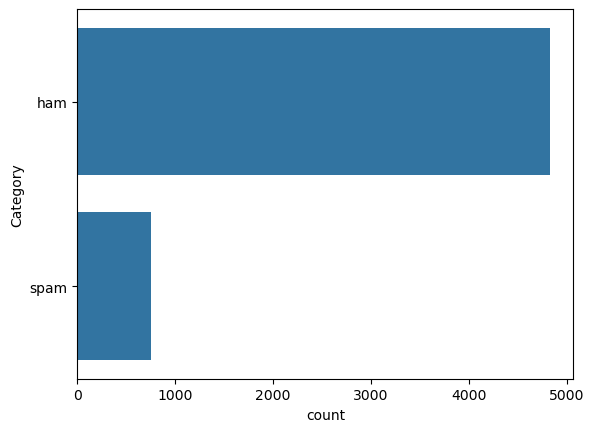

In [718]:
sns.countplot(data=df,y='Category')
plt.show()

In [719]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [720]:
df['Category']=encoder.fit_transform(df['Category'])

In [721]:
df.sample(4)

,Category,Message
3753,0,Why are u up so early?
4373,1,Ur balance is now £600. Next question: Complet...
5546,0,Ic. There are a lotta childporn cars then.
3300,0,Honeybee Said: *I'm d Sweetest in d World* God...


In [722]:
df.duplicated().sum()

415

In [723]:
df=df.drop_duplicates(keep='first')


In [724]:
df.duplicated().sum()

0

In [725]:
df.shape

(5157, 2)

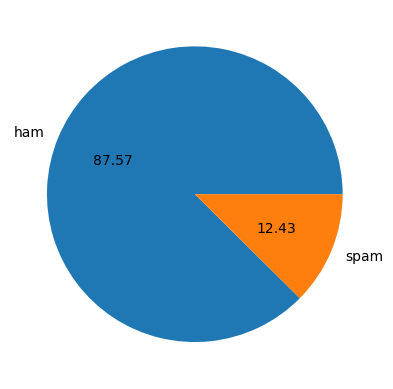

In [726]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [727]:
#data is imbalanced

In [728]:
!pip install nltk
import nltk

In [729]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [730]:
df['num of characters']=df['Message'].apply(len)

C:\Users\suven\AppData\Local\Temp\ipykernel_18620\670999571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num of characters']=df['Message'].apply(len)


In [731]:
df

,Category,Message,num of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [732]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['num of words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\suven\AppData\Local\Temp\ipykernel_18620\1970402814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num of words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [733]:
from nltk.tokenize import sent_tokenize
df['num of sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\suven\AppData\Local\Temp\ipykernel_18620\2817823060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num of sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [734]:
df.sample(6)

,Category,Message,num of characters,num of words,num of sent
1912,0,Lol grr my mom is taking forever with my presc...,92,20,3
716,0,When i have stuff to sell i.ll tell you,39,9,1
1315,0,Got but got 2 colours lor. One colour is quite...,122,30,3
3717,0,Networking technical support associate.,39,5,1
2815,0,"Alright if you're sure, let me know when you'r...",55,13,1
3564,1,Auction round 4. The highest bid is now £54. N...,130,36,5


In [735]:
df.describe()

,Category,num of characters,num of words,num of sent
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [736]:
#ham messages
df[df['Category']==0].describe()

,Category,num of characters,num of words,num of sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869353,17.267715,1.827724
std,0.0,56.708301,13.588065,1.394338
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [737]:
#spam messages
df[df['Category']==1].describe()

,Category,num of characters,num of words,num of sent
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.970359
std,0.0,30.399707,7.103501,1.485575
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


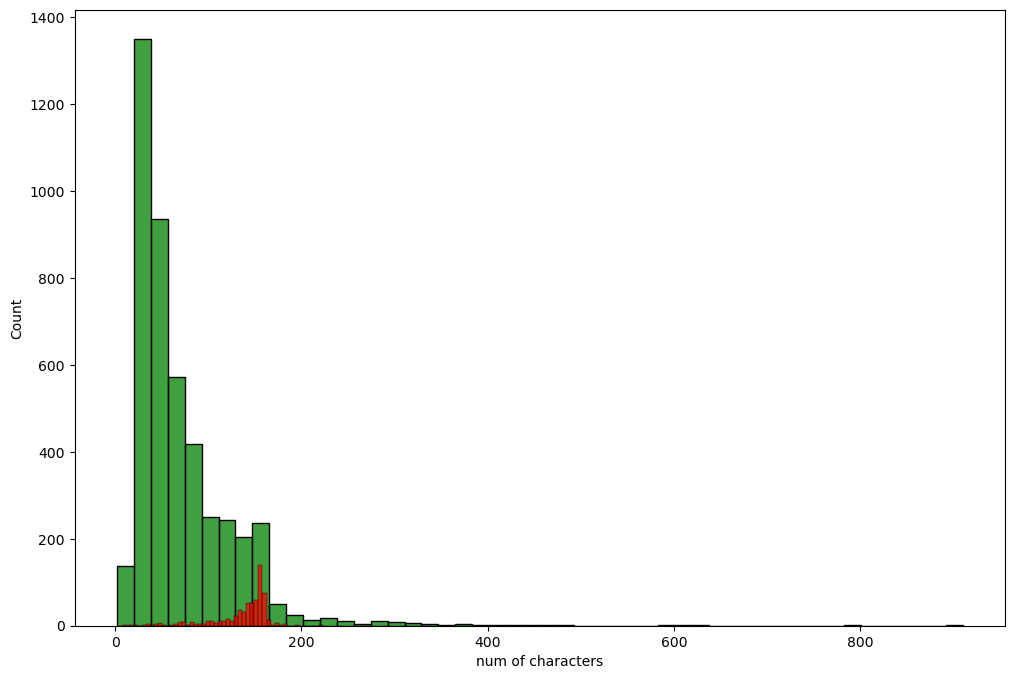

In [738]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Category']==0]['num of characters'],color='green',bins=50)
sns.histplot(df[df['Category']==1]['num of characters'],color='red',bins=50)
plt.show()


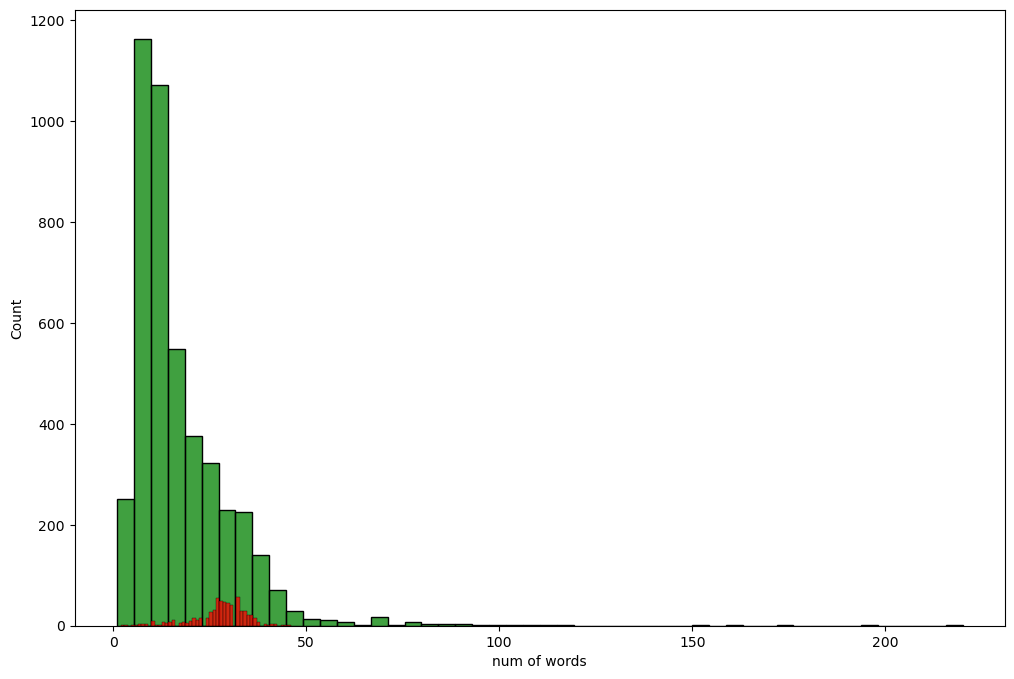

In [739]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Category']==0]['num of words'],color='green',bins=50)
sns.histplot(df[df['Category']==1]['num of words'],color='red',bins=50)
plt.show()

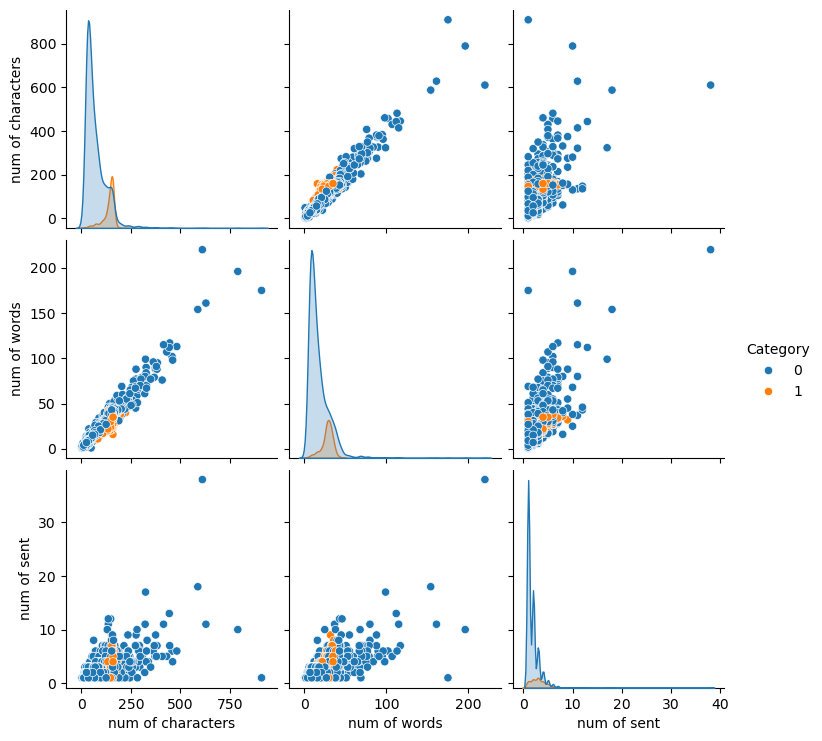

In [740]:
sns.pairplot(df.drop(columns=['Message']),hue='Category')
plt.show()

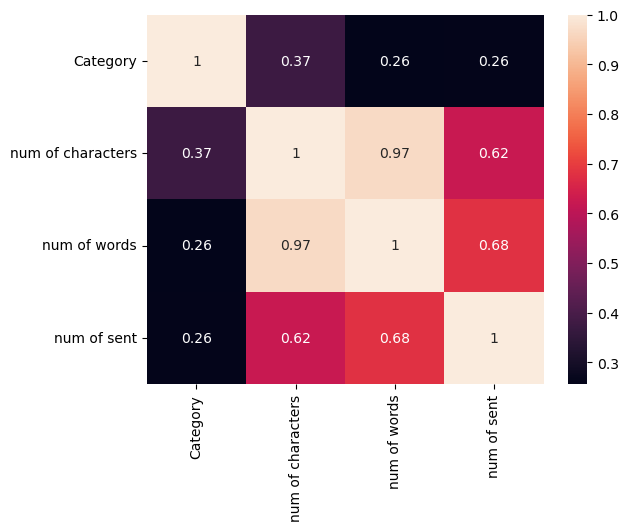

In [741]:

sns.heatmap(df.drop(columns=['Message']).corr(),annot=True)
plt.show()

'''text preprocessing
-Lower Case
-Tokenization
-Removing Special characters
-Removing stop words and punctuation
-Stemming'''

In [743]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=text
    text=[]
    for i in y:
        if i.isalnum():
            text.append(i)
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=[]
    ps=PorterStemmer()
    for i in y:
        text.append(ps.stem(i))
        
    return " ".join(text)

In [744]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

df['transformed_text']=df['Message'].apply(transform_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suven\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\suven\AppData\Local\Temp\ipykernel_18620\3618618445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Message'].apply(transform_text)


In [745]:
df.head(8)

,Category,Message,num of characters,num of words,num of sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...


In [746]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

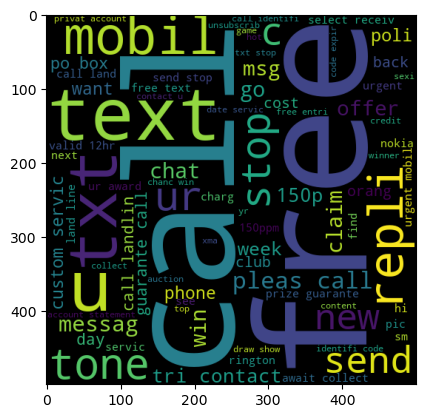

In [747]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

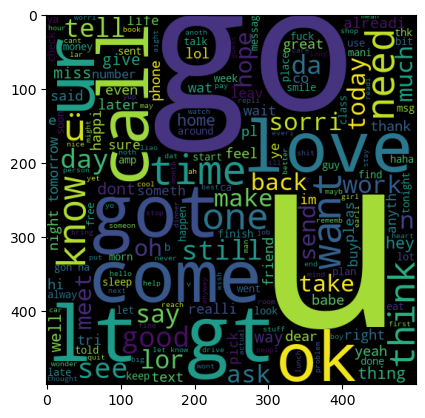

In [748]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [749]:
spam_corpus=[]
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [750]:
len(spam_corpus)

9781

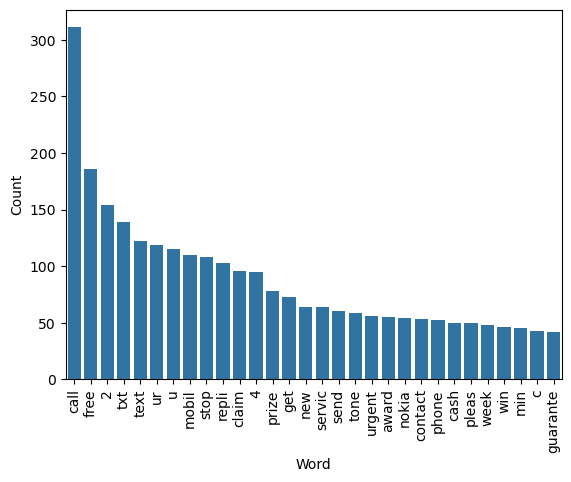

<Figure size 1200x2000 with 0 Axes>

In [751]:
from collections import Counter
# Count the most common words
word_counts = Counter(spam_corpus).most_common(30)

# Create a DataFrame with proper column names
df_word_counts = pd.DataFrame(word_counts, columns=["Word", "Count"])

# Plot using Seaborn
sns.barplot(x="Word", y="Count", data=df_word_counts)
plt.xticks(rotation="vertical")
plt.figure(figsize=(12,20))
plt.show()

In [752]:
ham_corpus=[]
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [753]:
len(ham_corpus)

35940

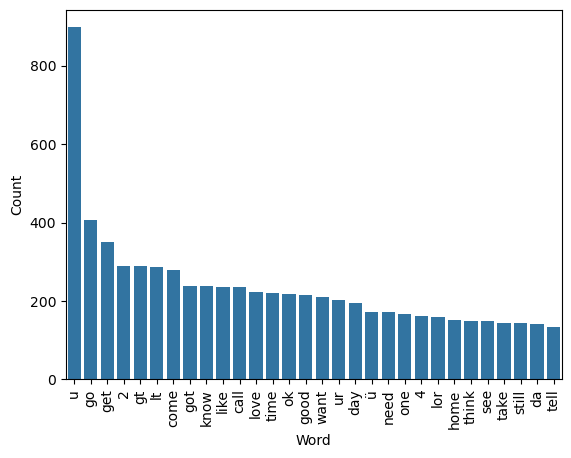

<Figure size 1200x2000 with 0 Axes>

In [754]:
from collections import Counter
# Count the most common words
word_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame with proper column names
df_word_counts = pd.DataFrame(word_counts, columns=["Word", "Count"])

# Plot using Seaborn
sns.barplot(x="Word", y="Count", data=df_word_counts)
plt.xticks(rotation="vertical")
plt.figure(figsize=(12,20))
plt.show()

In [755]:
#Model Building
#Using CountVectorizer(bag of words)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [756]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [757]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [758]:
'''from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\nX=scaler.fit_transform(X)'

In [759]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [760]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [761]:
y=df['Category']

In [762]:
from sklearn.model_selection import train_test_split

In [763]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [764]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [765]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
'''
# Visualization of Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()'''

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision_score:", precision)
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1466    0]
 [  91  145]]
Accuracy: 0.9465334900117509
Precision_score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1466
           1       1.00      0.61      0.76       236

    accuracy                           0.95      1702
   macro avg       0.97      0.81      0.87      1702
weighted avg       0.95      0.95      0.94      1702



In [766]:
# Initialize and train ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)

# Predictions
y_pred = cnb.predict(X_test)
print("Precision_score:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Precision_score: 0.6842105263157895
Accuracy: 0.9312573443008225
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1466
           1       0.68      0.94      0.79       236

    accuracy                           0.93      1702
   macro avg       0.84      0.93      0.87      1702
weighted avg       0.95      0.93      0.94      1702



In [767]:
from sklearn.naive_bayes import BernoulliNB
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predictions
y_pred = bnb.predict(X_test)
print("Precision_score:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Precision_score: 0.9835164835164835
Accuracy: 0.9647473560517039
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1466
           1       0.98      0.76      0.86       236

    accuracy                           0.96      1702
   macro avg       0.97      0.88      0.92      1702
weighted avg       0.97      0.96      0.96      1702



In [768]:
#Tfidf-Multinomial--Gives Precission(1)

In [769]:
#!pip install numpy pandas scikit-learn xgboost

In [770]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l1'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=2),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50,random_state=2),
    "AdaBoost":AdaBoostClassifier(n_estimators=50, random_state=2),
    "SVC":SVC(kernel='sigmoid', gamma=1.0),
    "KNN": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB(),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, random_state=2),
    "Bagging":  BaggingClassifier(n_estimators=50, random_state=2),
    "XGB":XGBClassifier(n_estimators=50,random_state=2)
}

# Store results
results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
    })
    
# Convert to DataFrame

results_df = pd.DataFrame(results)

# Display the results
print(results_df)


C:\Users\suven\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


             Classifier  Accuracy  Precision
0   Logistic Regression  0.934783   0.888199
1         Decision Tree  0.924794   0.837500
2         Random Forest  0.965922   0.989011
3     Gradient Boosting  0.941246   0.909639
4              AdaBoost  0.955347   0.904040
5                   SVC  0.967685   0.950249
6                   KNN  0.884841   1.000000
7         MultinomialNB  0.946533   1.000000
8           Extra Trees  0.973561   0.989744
9               Bagging  0.945358   0.826484
10                  XGB  0.962397   0.934343


In [774]:
performance_df=results_df.sort_values(by='Precision', ascending=False)
performance_df1 = pd.melt(performance_df, id_vars = "Classifier")

<Figure size 1400x600 with 0 Axes>

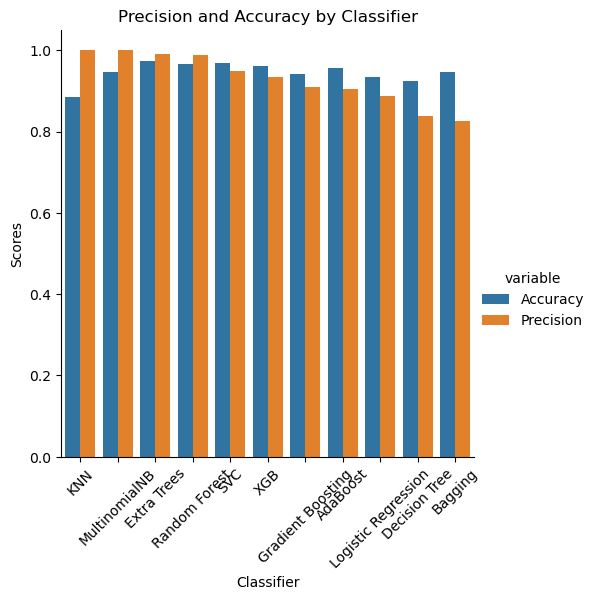

In [776]:
plt.figure(figsize=(14, 6))
sns.catplot(x="Classifier", y="value", hue="variable", 
            data=performance_df1,
            kind="bar")

# Set labels and title
plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Precision and Accuracy by Classifier')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [778]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [780]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [782]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [784]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [786]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9753231492361927
Precision 0.985


In [788]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [790]:
from sklearn.ensemble import StackingClassifier

In [792]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [794]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9794359576968272
Precision 0.9388646288209607


In [795]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))